<a href="https://colab.research.google.com/github/TelukantiSarika/Imdb_sentimental_analysis/blob/main/EwasteClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()  # You can select multiple files here

Saving archive (1).zip to archive (1).zip


In [2]:
import zipfile
import os

with zipfile.ZipFile("archive (1).zip", 'r') as zip_ref:
    zip_ref.extractall(".")

# Check the extracted structure
os.listdir("modified-dataset")

['test', 'val', 'train']

In [3]:
import tensorflow as tf

train_dir = "modified-dataset/train"
val_dir   = "modified-dataset/val"
test_dir  = "modified-dataset/test"

# ImageDataGenerator to load images
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
val_datagen   = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen  = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Load images from folders
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 2400 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 300 images belonging to 10 classes.


In [4]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# Freeze pretrained layers
base_model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

In [6]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [8]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    callbacks=[early_stop]
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - accuracy: 0.5881 - loss: 1.3480 - val_accuracy: 0.9233 - val_loss: 0.2319
Epoch 2/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.8973 - loss: 0.3396 - val_accuracy: 0.9433 - val_loss: 0.1688
Epoch 3/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step - accuracy: 0.9257 - loss: 0.2411 - val_accuracy: 0.9467 - val_loss: 0.1607
Epoch 4/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.9441 - loss: 0.1729 - val_accuracy: 0.9533 - val_loss: 0.1622
Epoch 5/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.9475 - loss: 0.1481 - val_accuracy: 0.9667 - val_loss: 0.1475
Epoch 6/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step - accuracy: 0.9616 - loss: 0.1264 - val_accuracy: 0.9500 - val_loss: 0.1585
Epoch 7/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.9767 - loss: 0.0882 - val_accuracy: 0.9533 - val_loss: 0.1441
Epoch 8/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.9804 - loss: 0.0730 - val_accuracy: 0.9533 - v

In [9]:
test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy:", test_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9425 - loss: 0.2221
Test Accuracy: 0.95333331823349


In [10]:
print("Test Loss:", test_loss)

Test Loss: 0.17339859902858734


In [11]:
predictions = model.predict(test_generator)
# If it's classification, get the predicted class
import numpy as np
predicted_classes = np.argmax(predictions, axis=1)

10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step


In [12]:
model.save('my_model.h5')

In [13]:
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

In [14]:
from google.colab import files
uploaded = files.upload()


Saving battery_4.jpg to battery_4.jpg


In [15]:
import os

# Get filename
img_name = list(uploaded.keys())[0]

# Save image to disk
with open(img_name, 'wb') as f:
    f.write(uploaded[img_name])

print("Saved image:", img_name)


Saved image: battery_4.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


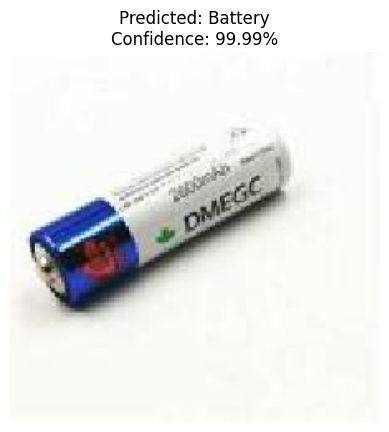

In [16]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load trained model
model = tf.keras.models.load_model('my_model.h5')

# Class labels (same order as training)
class_labels = [
    'Battery', 'Keyboard', 'Microwave', 'Mobile', 'Mouse',
    'PCB', 'Player', 'Printer', 'Television', 'Washing Machine'
]

# Load image safely
img = image.load_img(img_name, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)
predicted_class = class_labels[np.argmax(prediction)]
confidence = np.max(prediction) * 100

# Display result
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence:.2f}%")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


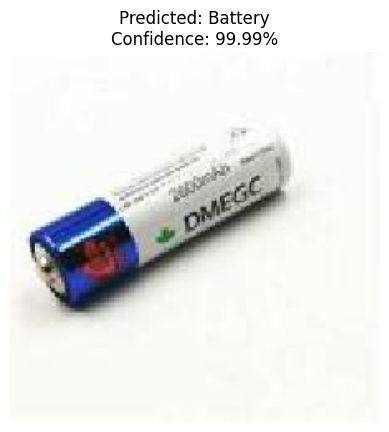

Predicted Class: Battery
Confidence: 99.98788


In [17]:
# --- Imports ---
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os

# Load trained model
model = tf.keras.models.load_model('my_model.h5')

# Class labels (same order as training)
class_labels = [
    'Battery', 'Keyboard', 'Microwave', 'Mobile', 'Mouse',
    'PCB', 'Player', 'Printer', 'Television', 'Washing Machine'
]

# Get uploaded image name
img_path = list(uploaded.keys())[0]

# Load & preprocess image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)
predicted_class = class_labels[np.argmax(prediction)]
confidence = np.max(prediction) * 100

# Show image & result
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence:.2f}%")
plt.show()

print("Predicted Class:", predicted_class)
print("Confidence:", confidence)


In [18]:
print("Model output shape:", model.output_shape)


Model output shape: (None, 10)


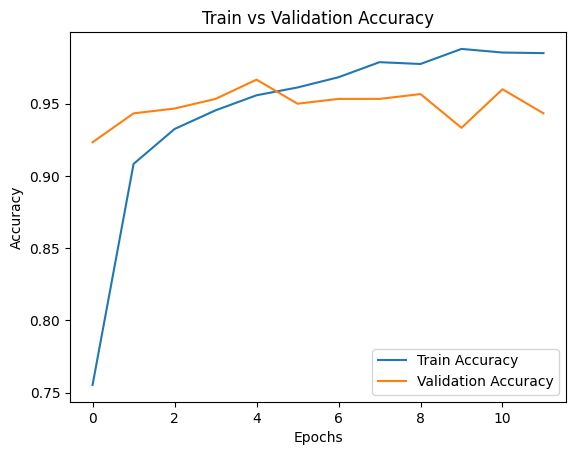

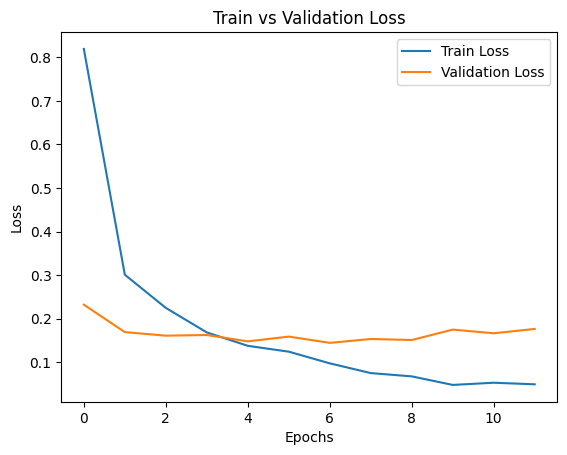

In [19]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train vs Validation Accuracy')
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Train vs Validation Loss')
plt.show()

In [20]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.9425 - loss: 0.2221
Test Accuracy: 0.9533


10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step


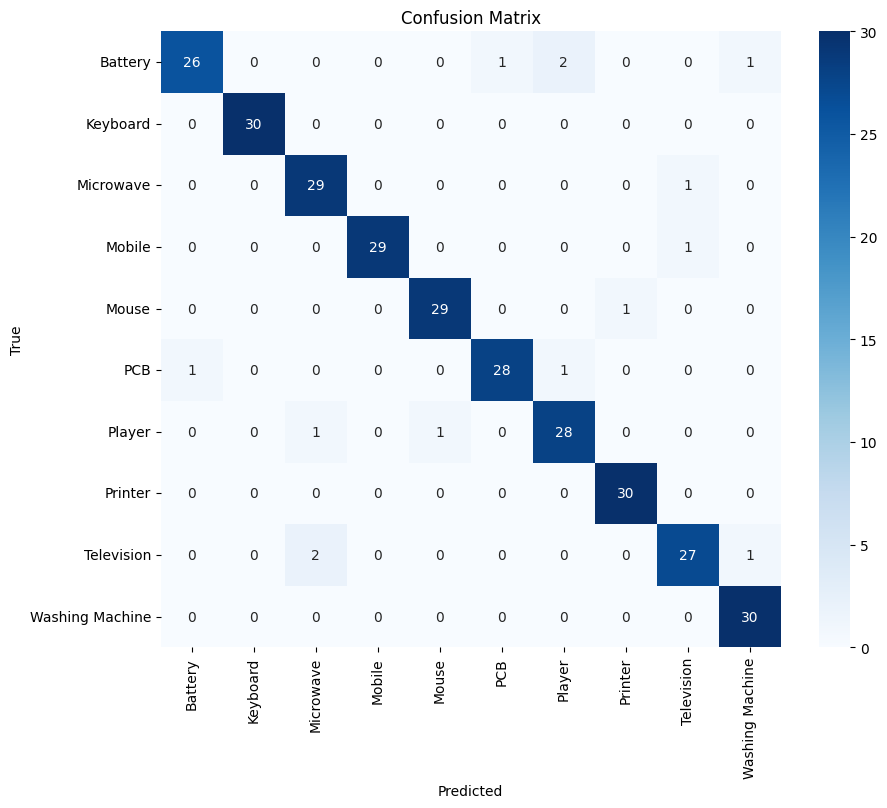

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

predictions = model.predict(test_generator)
pred_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

cm = confusion_matrix(true_classes, pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [22]:
from sklearn.metrics import classification_report

print(classification_report(true_classes, pred_classes, target_names=class_labels))

                 precision    recall  f1-score   support

        Battery       0.96      0.87      0.91        30
       Keyboard       1.00      1.00      1.00        30
      Microwave       0.91      0.97      0.94        30
         Mobile       1.00      0.97      0.98        30
          Mouse       0.97      0.97      0.97        30
            PCB       0.97      0.93      0.95        30
         Player       0.90      0.93      0.92        30
        Printer       0.97      1.00      0.98        30
     Television       0.93      0.90      0.92        30
Washing Machine       0.94      1.00      0.97        30

       accuracy                           0.95       300
      macro avg       0.95      0.95      0.95       300
   weighted avg       0.95      0.95      0.95       300

